In [1]:
# Madhusmita Mukherjee 20BCE2783

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")
# show plots inline
%matplotlib inline

In [3]:
data = pd.read_csv("BankNote_Authentication.csv")
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

In [5]:
# feature scaling

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.head(5)

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [6]:
from sklearn.cluster import KMeans
nclusters = 2
seed = 0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 0, ..., 0, 0, 0])

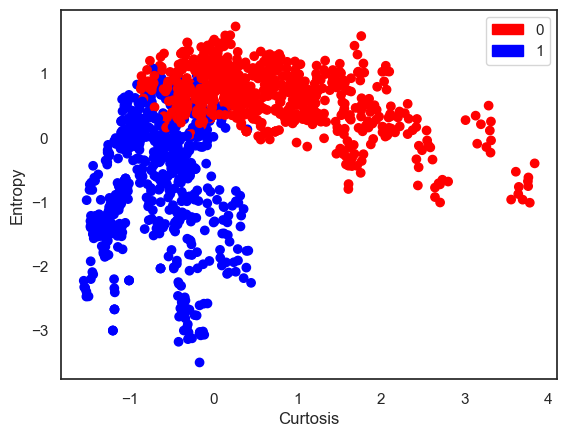

In [7]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
colors = np.array(['red', 'blue'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_kmeans])
plt.xlabel("Curtosis")
plt.ylabel("Entropy")
plt.legend(handles=[red_patch, blue_patch])
plt.show()

In [8]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.32905546282355036

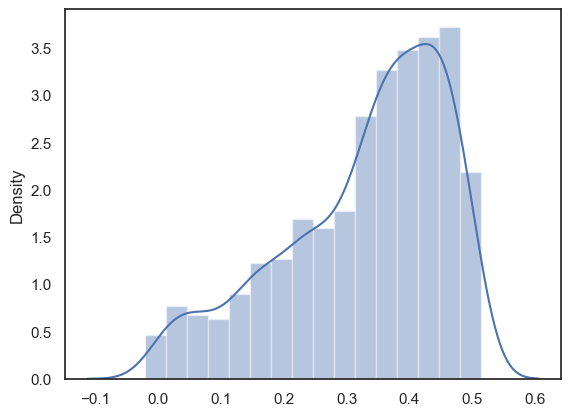

In [9]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_kmeans) 
score

0.012876881069629309

# GMM for bank note authentication dataset

In [11]:

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

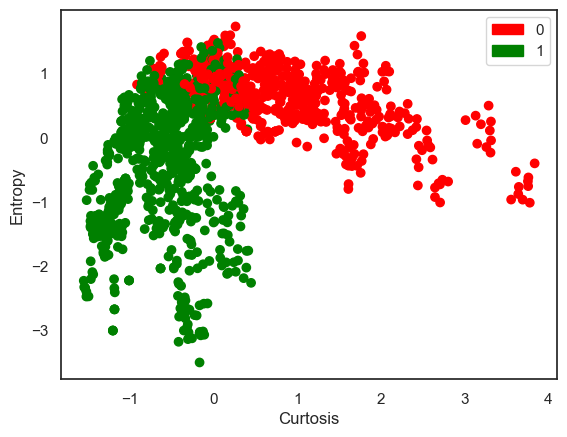

In [12]:
red_patch = mpatches.Patch(color='red', label='0')
green_patch = mpatches.Patch(color='green', label='1')
colors = np.array(['red', 'green'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_gmm])
plt.xlabel("Curtosis")
plt.ylabel("Entropy")
plt.legend(handles=[red_patch, green_patch])
plt.show()

In [13]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_gmm)
score


0.3018204599933313

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.003335410732303033